* Her hafta yeni bir algoritma öğreneceğimiz maceramızın ilk adımından yani Lineer Regresyon algoritmasından hepinize merhabalar. Bu notebook'ta, Lineer Regresyon algoritmamızı kendi oluşturmuş olduğumuz bir veri setini kullanarak uygulayacak, çıktılarını değerlendirip parametreleri değiştirip tekrar deneyip günün sonunda en başarılı Lineer Regresyon doğrusunu bulmaya çalışacağız. Hatta doğrumuzun bir de grafiğini çizdirip nasıl bir tahmin yaptığını da daha rahat görebileceğiz. Kütüphaneleri içe aktararak başlayalım.
* Hello to all of you from the first step of our adventure, where we will learn a new algorithm every week, namely the Linear Regression algorithm. In this notebook, we will apply our Linear Regression algorithm using a data set we have created, evaluate the outputs, change the parameters and try again, and try to find the most successful Linear Regression line at the end of the day. In fact, we will be able to draw a graph of our line and see what kind of prediction it makes more easily. Let's start by importing the libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

* Öncelikle Lineer Regresyon uygulamak için bir veri seti oluşturalım. Sevgili kütüphanemiz sklearn bize make_regression adında bir yöntem sunuyor. Bu yöntem, koşullarınızı kullanarak sizin için bir veri kümesi oluşturur. Bu notebook'ta make_regression yöntemini kullanarak sadece bir input sütunu ve buna karşılık gelen bir output sütunu içeren bir veri seti oluşturacağız. Bu veri setinde 10.000 satırımız olacak. Bir veri kümesi oluşturmak için yöntemimizi çağıralım ve ardından veri noktalarımızı net bir şekilde görmek için bu verileri görselleştirelim.
* Firstly, let's create a dataset to apply Linear Regression. Our lovely library is sklearn provides us a method which name is make_regression. This method creates a dataset for you by using your conditions. In this notebook, we will create a dataset with only one input column and one corresponding output column by using make_regression method. We will have 10.000 rows in this dataset. Let's call our method to create a dataset and after then let's visualize this data to see our data points clearly.

In [2]:
X, y = make_regression(n_samples=10000, n_features=1,
                                      n_informative=1, shuffle=True,
                                      random_state=42)

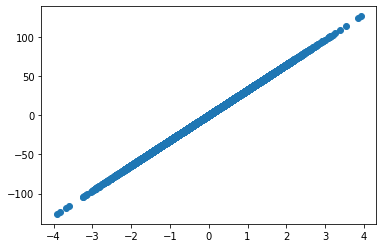

In [3]:
plt.plot(X, y, 'o')

* Gördüğünüz gibi, verilerimiz lineer regresyon için zaten mükemmel durumda. Lineer regresyon için işleri zorlaştırmak için verilerimize biraz gürültü ekleyelim. X (input) ve y (output) verilerimizin ilk 1000 satırı için numpy kütüphanesini kullanarak yeni rastgele değerler oluşturalım ve verilerimizi yeniden çizdirelim.
* As you can see our data is already in perfect shape for linear regression. To make things hard for linear regression let's add a little bit of noise to our data. For the first 1000 rows of our X (input) and y (output) data let's create new random values by using numpy library and re-plot our data.

In [4]:
np.random.seed(42)
X[:1000] = 3 + 0.5 * np.random.normal(size=(1000, 1))
y[:1000] = -3 + 10 * np.random.normal(size=1000)

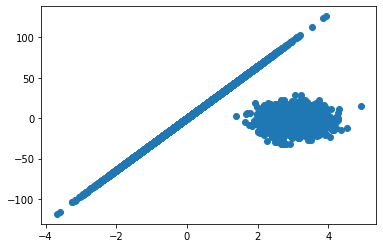

In [5]:
plt.plot(X, y, 'o')

* Şimdi her şey biraz daha karmaşık görünüyor. Tahmin yapmak hala çok daha kolay görünüyor ama artık lineer regresyon algoritması uygulayacak bir veri setimiz var. Bir intercept(doğru denklemindeki sabit değer) değeri olmayan bir lineer regresyon doğrusu oluşturmak için fit_intercept parametre değerini "False" olarak ayarlayarak Doğrusal Regresyon yöntemimizden bir örnek oluşturarak başlayalım.
* Now everything looks a bit more complex. It still looks too much easier to make predictions but in the end, we now have a dataset to apply linear regression algorithm. Let's start by creating an instance from our Linear Regression method by setting fit_intercept parameter value to "False" to create a linear regression line without an intercept value(constant value in the line equation).

In [6]:
reg = LinearRegression(fit_intercept = False)

* Şimdi verilerimizi eğitim ve test kısımları olmak üzere 2 parçaya ayıralım. Bu verileri bölmek için sklearn'in train_test_split yöntemini kullanacağız. Verilerimizin 0.67'sini eğitim verisi ve geri kalanını test verisi olarak bölelim.
* Now let's split our data into 2 parts which are train and test parts. To split this data, we will use sklearn's train_test_split method. Let's split 0.67 of our data as train data and the rest as test data. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

* Lineer regresyon modelimizi eğitmeye hazırız. Eğitim verilerimizi en iyi temsil eden doğruyu oluşturmak için regresyon modelimizin "fit" yöntemini çağıralım.
* We are ready to train our linear regression model. Let's call the "fit" method of our regression model to create a line which is representing our train data as the best one. 

In [8]:
fit_model = reg.fit(X_train, y_train)

* Şimdiye kadar doğrusal bir regresyon modeline uydurabilmek için veriler oluşturduk. Eğitim verilerini kullanarak bir lineer regresyon modeli eğittik. Şimdi Python'da bir yerde bir doğrumuz var. Bu doğrunun ne olduğunu merak etmiyor musunuz? Lineer regresyon doğrusunun katsayılarını ve sabit değerini görmek için lineer regresyonun "coef_" ve "intercept_" özniteliklerini çağıralım.
* So far we have created data to fit a linear regression model. We have trained a linear regression model by using train data. Now we have a line somewhere in Python. Are not you wondering what is this line? Let's call "coef_"  and "intercept_" attributes of linear regression to see the coefficients and intercept value of the linear regression line. 

In [9]:
fit_model.coef_

array([15.8285946])

In [10]:
fit_model.intercept_

0.0

* "coef_" özniteliğinin çıktısı bize eğitilmiş bir lineer regresyon doğrusunun katsayılarını gösterir. Modelimizde sadece bir girdi sütunu vardı, dolayısıyla sadece bir katsayımız var. Hatırlayacağınız gibi fit_intercept parametre değerini "False" yaparak lineer regresyon modelimizin doğru denklemimizde sabit bir değer oluşturmasını engelliyoruz. Bu nedenle model, sabit değeri 0 olarak ayarladı ve (y = 15.8285946 * x + 0) gibi bir doğru formülü oluşturdu. Artık modelimiz herhangi bir X değerini tahmin etmeye hazır. Doğrusal regresyonun "predict" yöntemini kullanarak X_test verilerinin sonuçlarını tahmin etmeye çalışalım.
* The output of the "coef_" attribute shows us the coefficients of a trained linear regression line. In our model there was only one input column hence we only have one coefficient. As you remember, we prevent our linear regression model to create a constant value in our line equation by setting fit_intercept parameter value to "False". Hence model set the constant value to 0 and created a line formula such as (y = 15.8285946 * x + 0). Now our model is ready to predict any X value. Let's try to predict the results of X_test data by using "predict" method of linear regression.

In [11]:
predictions = fit_model.predict(X_test)

* Şimdi verilen X_test verilerine göre tahminlerimiz var. Herhangi bir model, verilen girdiyi kullanarak herhangi bir değeri tahmin edebilir. Fakat tahminlerin doğru olduğunu nasıl bilebiliriz? Bir sınıflandırma algoritması için, tahmin edilen sınıf gerçek sınıfla aynıysa, bu tahminin doğru olduğu anlamına gelir. Ancak bir regresyon algoritması için bu tam olarak doğru değildir. Bir yakıt tüketimi probleminiz olduğunu düşünün. Bir arabanın 100 mil boyunca ne kadar yakıt tükettiğini tahmin etmek istiyorsunuz. Gerçek değer 100 mil başına 18,3 galon iken, regresyon modeliniz bu değeri 100 mil başına 22,4 galon olarak tahmin ediyor. Modelin tamamen yanlış olduğunu söyleyemeyiz. Hala yanlış ama 100 mil başına 3,9 galona eşit bir "hata" ile de doğru. Bu hesaplamayı verilerimizdeki tüm veri noktaları için yaparsak ve bu değerleri toplarsak, regresyon modelimizin genel hatasını bulabiliriz. Bulabilir miyiz? Bu değeri hesaplamak için kendi metodumuzu oluşturalım.
* Now we have our predictions according to the given X_test data. Any model can predict any value by using the given input. But how can we know that the predictions are true? For a classification algorithm, we can easily say that if the predicted class is the same as the real class that means the prediction is true. But for a regression algorithm, it is not exactly true. Imagine that you have a fuel consumption problem. You want to predict how much fuel a car consumes for 100 miles. While the real value is 18.3 gallons per 100 miles, your regression model is predicting this value as 22.4 gallons per 100 miles. We can not say the model is totally wrong. It is still wrong but it is also right with an "error" which is equal to 3.9 gallons per 100 miles. If we make this calculation for all of the data points in our data and we sum these values, we can find the overall error of our regression model. Can we find it? Let's create our own method to calculate this value.

In [12]:
def error_calculator(prediction_values, true_values):
    value_matrix = pd.DataFrame([true_values, prediction_values, true_values-prediction_values])
    value_matrix = value_matrix.T
    value_matrix = value_matrix.rename(columns = {0 : 'Real Values', 1 : 'Predictions', 2 : 'Errors'})
    return value_matrix

In [13]:
evaluation_matrix = error_calculator(predictions, y_test)

In [14]:
evaluation_matrix

,Real Values,Predictions,Errors
0,-39.488159,-19.456249,-20.031910
1,-14.294133,-7.042876,-7.251257
2,-9.083790,-4.475683,-4.608107
3,17.898334,8.818705,9.079629
4,-25.215264,-12.423837,-12.791427
...,...,...,...
3295,-2.593062,-1.277630,-1.315432
3296,35.464436,17.473717,17.990720
3297,-57.950025,-28.552613,-29.397413
3298,9.760330,4.809021,4.951308


In [15]:
print('Overall error : {0}'.format(str(evaluation_matrix['Errors'].sum())))

Overall error : -18059.991293458326


* Tahminleri ve gerçek değerleri girdi olarak alan bir metot oluşturduk. Bu metot, gerçek değerleri, tahmin değerlerini ve gerçek değer - tahmin değerine eşit olan hataları saklayan bir data frame oluşturuyor. "Errors" sütunundaki tüm değerleri topladığımızda -18059 ile karşılaşıyoruz. Ama bu gerçekten doğru mu? 5. (index 4) satır ve 3300. (index 3299) satırdaki hata değerlerini kontrol edelim. Bu değerler yaklaşık -12,7 ve 11,9'dur. Bu iki değeri toplarsak, bu iki veri noktasının toplam hatasını -0,8 olarak buluruz ancak haklısınız bu hata değerlerini doğrudan toplayamayız. Bu toplam, pozitif ve negatif değerler nedeniyle hataların birbirini yok etmesine neden olabilir. Hata değerlerinin karesini alarak negatiflik etkisini ortadan kaldırmaya çalışalım.
* We have created a method that takes predictions and real values as input. This method is creating a data frame that stores real values, prediction values, and errors which is equal to real value - prediction value. Once we sum all of the values in the "Errors" column we come up with -18059. But is it really true? Let's check the error values at the 5th (index 4) row and the 3300th (index 3299) row. These values are approximately -12,7 and 11,9. If we sum these two values we find the overall error of these two data points as -0,8 but you are right we can not directly sum these error values. This summation can cause errors to destroy each other because of positive and negative values. Let's try to eliminate the effect of negativity by taking the square of error values.  

In [16]:
evaluation_matrix['SquareofErrors'] = evaluation_matrix['Errors'] ** 2
evaluation_matrix['RootofSquares'] = evaluation_matrix['SquareofErrors'] ** (0.5)
evaluation_matrix

,Real Values,Predictions,Errors,SquareofErrors,RootofSquares
0,-39.488159,-19.456249,-20.031910,401.277423,20.031910
1,-14.294133,-7.042876,-7.251257,52.580727,7.251257
2,-9.083790,-4.475683,-4.608107,21.234649,4.608107
3,17.898334,8.818705,9.079629,82.439658,9.079629
4,-25.215264,-12.423837,-12.791427,163.620609,12.791427
...,...,...,...,...,...
3295,-2.593062,-1.277630,-1.315432,1.730361,1.315432
3296,35.464436,17.473717,17.990720,323.665996,17.990720
3297,-57.950025,-28.552613,-29.397413,864.207866,29.397413
3298,9.760330,4.809021,4.951308,24.515453,4.951308


In [17]:
print('Overall error : {0}'.format(str(evaluation_matrix['RootofSquares'].sum())))

Overall error : 55420.28514226148


* Öncelikle tüm hata değerlerinin karesini hesapladık. Daha sonra bu hesaplamanın karekökünü alıyoruz. Bunu yaparak işaretin etkisini ortadan kaldırdık. Daha sonra "RootofSquares" içindeki tüm değerleri toplayarak yeni hata değerini kontrol ettik. Orijinal ("Errors" sütunu) hataların hepsini toplayarak bulduğumuz ilk hata değeri 18059'du ama şimdi "RootofSquares" sütun değerlerini toplayarak bulduğumuz hata değeri 55420. İlkinin neredeyse 3 katı ama size mantıklı geliyor mu? 55420 gibi bir hata değerinin neye göre anlamı nedir? Yüksek mi düşük mü yoksa normal mi? Değerine göre kesin bir şey söyleyemeyiz. Genel bir metrik bulmaya çalışalım. Böyle bir metrik oluşturmak için önce gerçek değerlerin ortalamasını hesaplayalım.
* Firstly we calculated the square of all of the error values. After then we get the square root of this calculation. By doing this we eliminated the effect of the sign. After then we have checked the new error value by summing all of the values in the "RootofSquares". The first error value which we found by summing all of the original ("Errors" column) errors was 18059 but now the error value which we found by summing "RootofSquares" column values is 55420. It is almost 3 times the first one but does it make sense to you? What is the meaning of an error value such as 55420 according to what? Is it high, low, or normal? We are not able to say exact things according to the value. Let's try to come up with a general metric. To create such a metric first, let's calculate the mean of real values.

In [18]:
print('Mean : {0}'.format(str(evaluation_matrix['Real Values'].mean())))

Mean : -0.6676087336709571


* Gerçek değerlerin ortalaması -0,67'ye eşittir. Her bir gerçek değerden gerçek değerlerin ortalamasını çıkarırsak, sonuçların karesini alır ve toplarsak, verilerimizin toplam varyansını buluruz. Ayrıca hataların kareleri de var ve bu değerleri toplarsak verilerimizin açıklanamayan (unexplained) varyansını bulabiliriz. Açıklanamayan varyans ile toplam varyans arasındaki oranı 1'den çıkarırsak, regresyon modelimiz için "R kare değeri" hesaplayabiliriz. Önce bu değeri hesaplamaya çalışalım sonra R karenin değerine göre değerlendirmelerimizi yapıp gerçekte ne olduğunu ve bu değerin bizim için ne anlama geldiğini anlamaya çalışalım.
* The mean of real values is equal to -0,67. If we subtract the average real values from each of the real values, square the results, and sum them we find the total variance for our data. We also have the squares of errors and if we sum these values we can find the unexplained variance of our data. If we subtract the ratio between unexplained variance and total variance from 1, we can calculate "the R square value" for our regression model. Firstly let's try to calculate this value after then we will make our evaluations according to the value of R square and try to understand what really it is and what is the meaning of this value for us.

In [19]:
evaluation_matrix['TotalVariance'] = (evaluation_matrix['Real Values'] - evaluation_matrix['Real Values'].mean())**2

In [20]:
evaluation_matrix

,Real Values,Predictions,Errors,SquareofErrors,RootofSquares,TotalVariance
0,-39.488159,-19.456249,-20.031910,401.277423,20.031910,1507.035122
1,-14.294133,-7.042876,-7.251257,52.580727,7.251257,185.682163
2,-9.083790,-4.475683,-4.608107,21.234649,4.608107,70.832102
3,17.898334,8.818705,9.079629,82.439658,9.079629,344.694238
4,-25.215264,-12.423837,-12.791427,163.620609,12.791427,602.587397
...,...,...,...,...,...,...
3295,-2.593062,-1.277630,-1.315432,1.730361,1.315432,3.707370
3296,35.464436,17.473717,17.990720,323.665996,17.990720,1305.524678
3297,-57.950025,-28.552613,-29.397413,864.207866,29.397413,3281.275262
3298,9.760330,4.809021,4.951308,24.515453,4.951308,108.741897


In [21]:
UnexplainedVariance = evaluation_matrix['SquareofErrors'].sum()
TotalVariance = evaluation_matrix['TotalVariance'].sum()
print("Unexplained Variance = {0}".format(UnexplainedVariance))
print("Total Variance = {0}".format(TotalVariance))
print("R Square Score = {0}".format(1 - (UnexplainedVariance / TotalVariance)))

Unexplained Variance = 1715974.3702409766
Total Variance = 3036650.851272557
R Square Score = 0.434912192976723


* R kare değerini 0,43 olarak buluyoruz. R kare skoru, bize verilerin regresyon doğrusuna ne kadar yakın olduğunu söyler. Başka bir deyişle, verilerimize bir regresyon doğrusuna çizme konusunda ne kadar başarılı olduğumuzu gösterir. Doğrusal bir model tarafından açıklanan hedef değişken varyasyonunun yüzdesidir. R kare skoru (belirleme katsayısı olarak da bilinir) hesaplamamızın payında, hataların toplamının karesine bulunmakta. Modelimiz verilerimize tam olarak uyuyorsa, yani 0 hata varsa R kare skoru tam olarak 1 olacaktır. R kare skoru 0 ise bu, pay ve paydanın birbirine eşit olduğu anlamına gelir. Bu durumda model, y değerlerinin ortalamasına eşit bir sabit değer tahminler. Bu tür bir modele "sabit model" adı verilir. Şimdi y = 15.8285946 * x olan tek bir regresyon modelimiz var. Intercept değeri olan modeli denemedik bile. Dolayısıyla bu modelin bu verileri en iyi temsil ettiğini söyleyemeyiz. Şimdi regresyon modelimize intercept değerini ekleyelim ve R kare değerini tekrar hesaplayalım.
* We come up with a 0.43 R squared value. R squared score simply tells us how close the data are to the fitted regression line. In other words, shows us how successful we are to fit a regression line to our data. It is the percentage of the target variable variation that is explained by a linear model. At the numerator of our R squared score (also known as the coefficient of determination) calculation, we have the square of the summation of errors. If our model fits our data perfectly which means 0 error score R squared score will be exactly 1. If the R squared score is 0 that means the numerator and the denominator are equal to each other. In that case, the model is predicting a constant value that is equal to the mean of y values. That kind of model is named as"constant model". Now we have only one regression model which is y = 15.8285946 * x. We did not even try the model with an intercept value. Hence we can not say that this model is the best one to represent this data. Now let's add the intercept value to our regression model and calculate the r squared value again.

In [22]:
reg.set_params(fit_intercept = True)

LinearRegression()

In [23]:
fit_model = reg.fit(X_train, y_train)

In [24]:
predictions = fit_model.predict(X_test)

In [25]:
fit_model.coef_

array([16.64810186])

In [26]:
fit_model.intercept_

-5.063381766126678

In [27]:
fit_model.score(X_test, y_test)

0.46508832694715396

* Biz ne yaptık? İlk olarak sklearn'in en sihirli yöntemlerinden biri olan set_params'ı kullandık. Bu yöntem, model parametrelerini güncellememize yardımcı olur. Fit_intercept parametresinin değerini "False"tan "True"ya güncellemek için ilk modelimizde bu yöntemi kullandık. Daha sonra modelimizi tekrar fit ettik ve aynı veri setini kullanarak yeni değerler tahmin ettik. Modelimizin coef_ ve intercept_ özniteliklerini çağırdığımızda, intercept değeri -5'e eşit olan farklı bir modelimiz olduğunu görebiliriz. Ve son olarak, yeni R kare değerimiz var. Ama şimdi gördüğünüz gibi katsayı matrisimizi kullanmadık veya yeni bir tane oluşturmadık. Yepyeni bir yöntem olan "score" yöntemini kullandık. Bu yöntem, girdi olarak X ve y değerlerini alır ve arka planda bu verileri bir modeli eğitmek için kullanır. Yöntem bir regresyon doğrusunu çizdiğinde, yeni değerleri tahmin etmek için de kullanır. Tahminler yapıldığında yöntem, R kare skorunu hesaplamak için katsayı matrisimizle yaptığımızın aynısını yapmak için bu tahminleri kullanır ve çıktı olarak R kare skorunu döndürür. Bu iki modelin R kare sonuçlarını karşılaştırırsak, intercept değeri olanın intercept değeri olmayandan daha iyi olduğunu görebiliriz. Bu veriler için en iyi modelimiz ikinci lineer regresyon doğrusudur. Ancak bu doğru, verilerimizi bir koordinat düzleminde nasıl temsil ediyor? Hadi grafiğini çizelim!
* What did we do? Firstly we used one of the most magical methods of sklearn that is set_params. This method helps us to update model parameters. We have used this method with our initial model to update fit_intercept parameter's value from "False" to "True". After then we have fitted our model again and predicted new values by using the same dataset. Once we call the coef_ and intercept_ attributes of our model, we can see that now we have a different model now with an intercept value that is equal to -5. And finally, we have our new R square value. But as you can see now we did not use our coefficient matrix or we did not create a new one. We have used a brand new method that is "score". This method gets X and y values as input and in the background uses these data to fit a model. Once the method fits a regression line it is also used to predict new values. When the predictions are done method uses these predictions to do the same thing that we did with our coefficient matrix to calculate R squared score and returns the R squared score as an output. If we compare the R squared results of these two models, we can see that the one with an intercept value is better than the one without an intercept value. For this data, our best model linear regression line is the second one. But how does this line represents our data in a coordinate plane? Let's graph it!

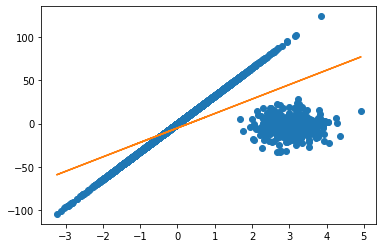

In [28]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, predictions);

* Bu notebook'ta sizlere lineer regresyonu tüm detaylarıyla açıklamaya çalıştım. Umarım her şey sizin için bilgilendiricidir. Bu alıştırmaları en az bir kez daha denemenizi veya modelimize yeni şeyler eklemeyi deneyerek R kare skorundaki değişimi görmenizi öneririm. Önümüzdeki hafta ML101 serisinin ikinci algoritması olan Logistic Regression ile ilgili yeni bir notebook oluşturup paylaşacağım. Önümüzdeki Cumartesi tekrar görüşene kadar sağlıklı bir hafta geçirmenizi dilerim.
* In this notebook, I have tried to explain linear regression to you with all of the details. I hope that everything is informative for you. I suggest you try these exercises at least one more time or you can try to add new things to our model to see the change at the R squared score. Next week I will create and share a new notebook about the second algorithm of the ML101 series that is Logistic Regression. I wish you a healthy week until we see each other the next Saturday. 